In [5]:
# !pip install powerlaw --quiet

In [6]:
import powerlaw
import pandas as pd
import matplotlib.pyplot as plt

# Distribuição de palavras

_Moby Dick_ de Herman Melville

M. E. J. Newman, "Power laws, Pareto distributions and Zipf's law." Contemporary Physics 46, 323 (2005).

In [9]:
url = 'https://aaronclauset.github.io/powerlaws/data/words.txt'
words = pd.read_csv(url, header=None)[0]
words.head(10)

0    14086
1     6414
2     6260
3     4573
4     4484
5     4040
6     2917
7     2483
8     2374
9     1942
Name: 0, dtype: int64

In [8]:
words.describe()

count    18855.000000
mean        11.137311
std        148.332658
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max      14086.000000
Name: 0, dtype: float64

## Rank plot

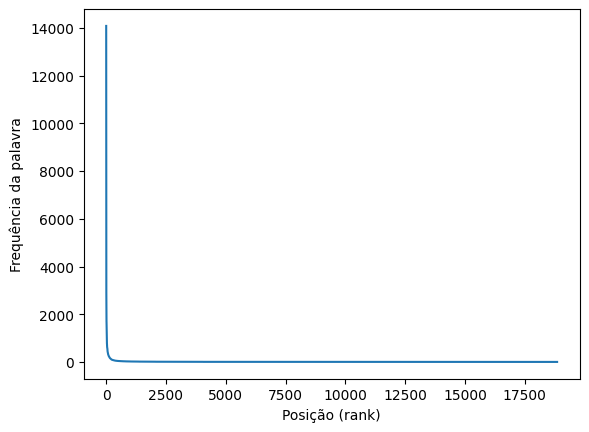

In [11]:
y = words.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.xlabel('Posição (rank)')
plt.ylabel('Frequência da palavra');

Em escala logarítmica:

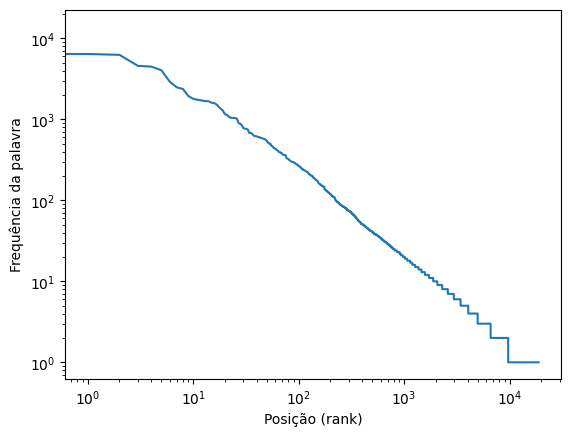

In [12]:
y = words.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Frequência da palavra');

## Histograma

### Histograma padrão

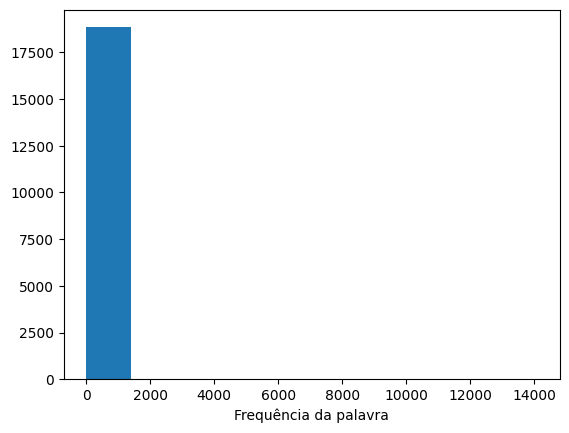

In [13]:
plt.hist(words)
plt.xlabel('Frequência da palavra');

Adicionando escala logarítmica

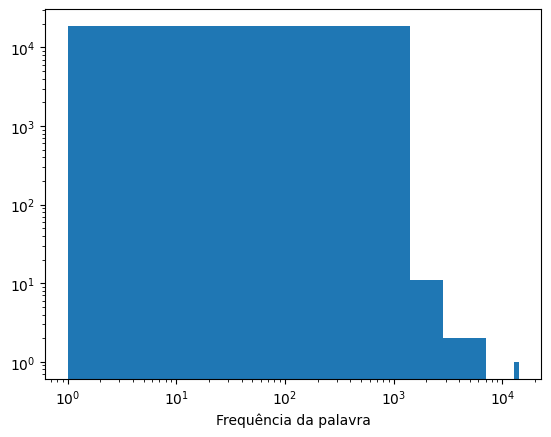

In [14]:
plt.hist(words)
plt.loglog()
plt.xlabel('Frequência da palavra');

### Histograma para Lei de Potência

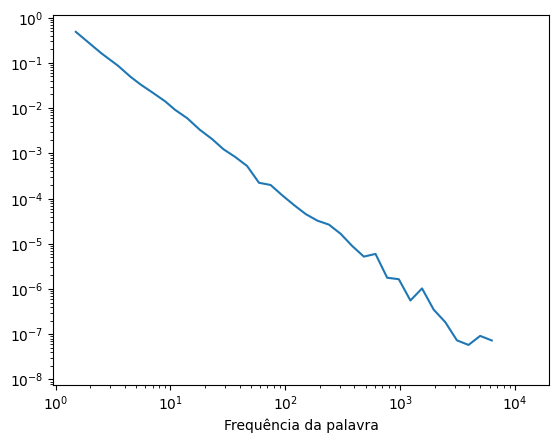

In [15]:
powerlaw.plot_pdf(words)
plt.xlabel('Frequência da palavra');

## Função Distribuição (CDF)

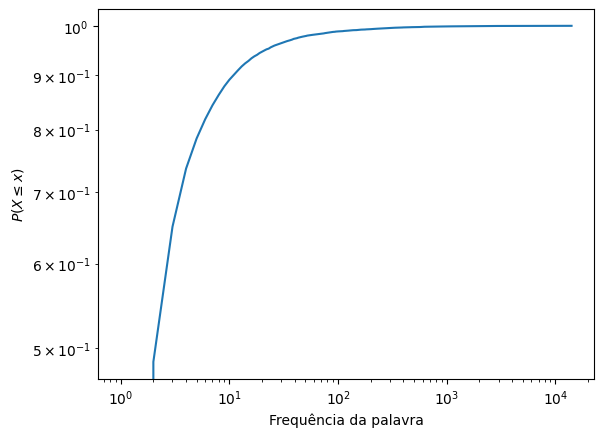

In [16]:
powerlaw.plot_cdf(words)
plt.ylabel(r'$P(X \leq x)$');
plt.xlabel('Frequência da palavra');

## Função Distribuição Complementar (CCDF)

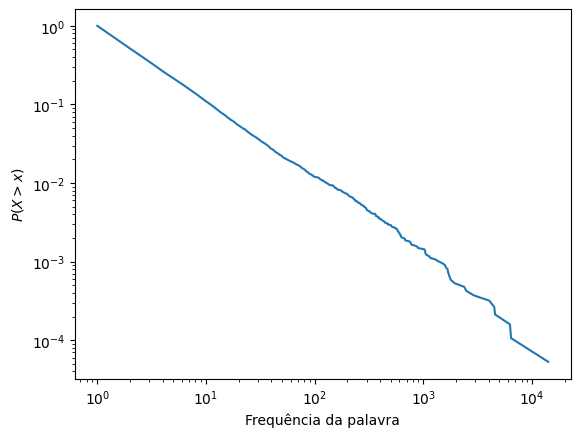

In [17]:
powerlaw.plot_ccdf(words)
plt.ylabel(r'$P(X > x)$')
plt.xlabel('Frequência da palavra');

Comparando com o histograma (PDF):

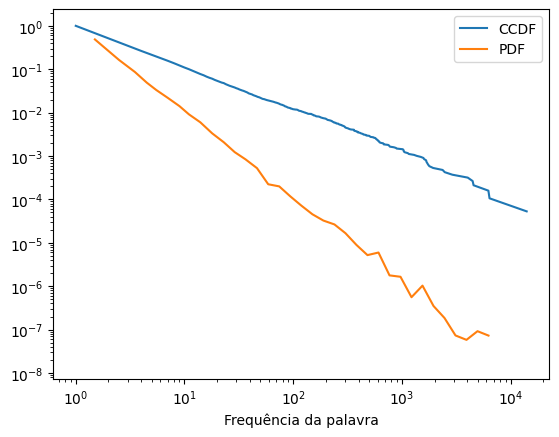

In [18]:
powerlaw.plot_ccdf(words, label='CCDF')
powerlaw.plot_pdf(words, label='PDF')
plt.legend()
plt.xlabel('Frequência da palavra');

## Modelagem com Lei de Potência

In [19]:
fit = powerlaw.Fit(words)

Calculating best minimal value for power law fit


Valor mínimo para Lei de Potência:

In [20]:
fit.power_law.xmin

6.0

Coeficiente da Lei de Potência:

In [21]:
fit.power_law.alpha

2.023004831109283

Quanto **menor** o coeficiente, mais **extrema** é a Lei de Potência

Comparando **modelo** com os dados:

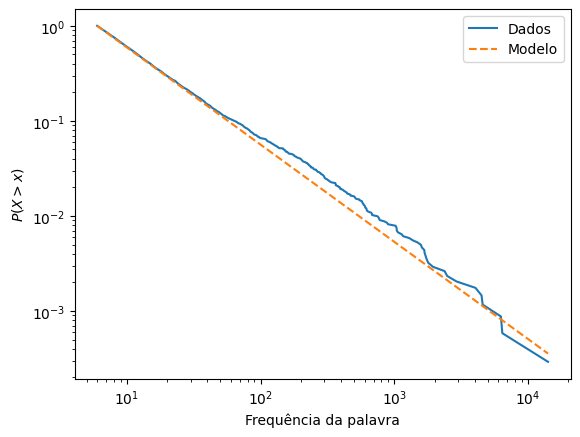

In [22]:
fig = fit.plot_ccdf(label='Dados')
fit.power_law.plot_ccdf(label='Modelo', linestyle='--', ax=fig)
plt.legend()
plt.ylabel(r'$P(X > x)$')
plt.xlabel('Frequência da palavra');

# Distribuição de graus na Web

A. Broder et al., "Graph structure in the Web." Computer Networks 33, 309 (2000).

In [23]:
url = 'https://aaronclauset.github.io/powerlaws/data/weblinks.hist'
web = pd.read_csv(url, sep='\t', index_col='degree')['frequency']
web

degree
0           35159835
1          106649769
2           40711748
3           22648832
4           12617832
             ...    
855264             1
874041             1
934796             1
1198284            1
1199466            1
Name: frequency, Length: 14480, dtype: int64

In [24]:
web.describe()

count    1.448000e+04
mean     1.910143e+04
std      1.022556e+06
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      1.100000e+01
max      1.066498e+08
Name: frequency, dtype: float64

## Rank plot

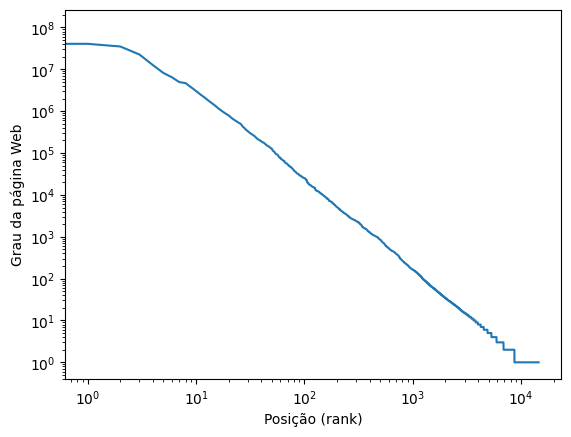

In [25]:
y = web.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Grau da página Web');

## CCDF

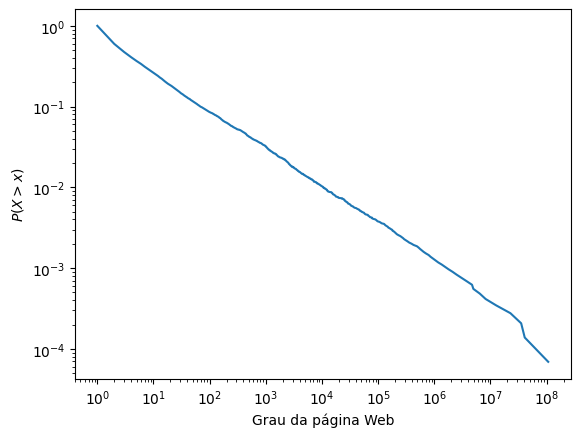

In [26]:
powerlaw.plot_ccdf(web)
plt.ylabel(r'$P(X > x)$')
plt.xlabel('Grau da página Web');

## Modelagem com Lei de Potência

In [27]:
fit = powerlaw.Fit(web)

Calculating best minimal value for power law fit


Valor mínimo para Lei de Potência:

In [28]:
fit.power_law.xmin

4.0

Coeficiente da Lei de Potência:

In [29]:
fit.power_law.alpha

1.4907779002543942

Quando temos **alpha < 2**, nem a **média** nem o **desvio padrão** estão definidos!

Comparando **modelo** com os dados:

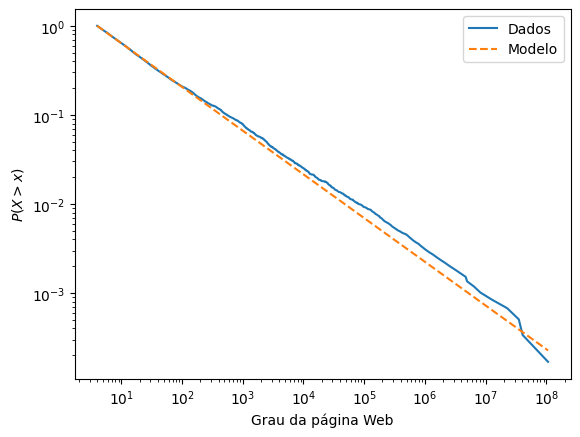

In [30]:
fig = fit.plot_ccdf(label='Dados')
fit.power_law.plot_ccdf(label='Modelo', linestyle='--', ax=fig)
plt.legend()
plt.ylabel(r'$P(X > x)$')
plt.xlabel('Grau da página Web');

# Distribuição de graus em uma rede metabólica

Rede metabólica da bactéria *Escherichia coli*.

M. Huss and P. Holme, "Currency and commodity metabolites: their identification and relation to the modularity of metabolic networks." IET Systems Biology 1, 280 (2007).

In [31]:
url = 'https://aaronclauset.github.io/powerlaws/data/eco-dd.txt'
bacteria = pd.read_csv(url, sep='\t', index_col='degree')['count']
bacteria

degree
1      126
2      485
3      282
4      280
5      163
      ... 
464      0
465      0
466      0
467      0
468      1
Name: count, Length: 468, dtype: int64

In [32]:
bacteria.describe()

count    468.000000
mean       3.506410
std       30.752621
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      485.000000
Name: count, dtype: float64

Vamos descartar os graus com frequência 0:

In [33]:
bacteria = bacteria[bacteria > 0]
bacteria.describe()

count     48.000000
mean      34.187500
std       91.244972
min        1.000000
25%        1.000000
50%        1.500000
75%        6.750000
max      485.000000
Name: count, dtype: float64

## Rank plot

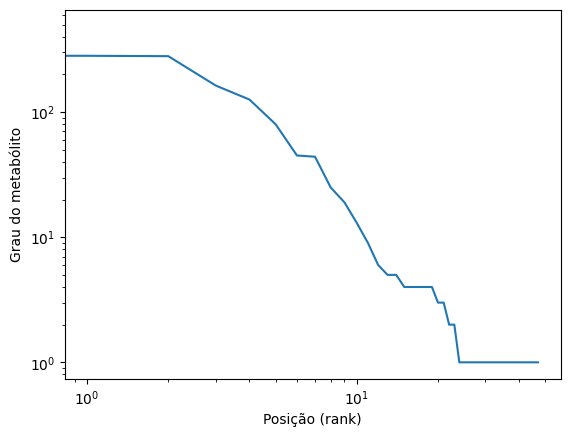

In [34]:
y = bacteria.sort_values(ascending=False)
x = range(len(y))
plt.plot(x, y)
plt.loglog()
plt.xlabel('Posição (rank)')
plt.ylabel('Grau do metabólito');

## CCDF

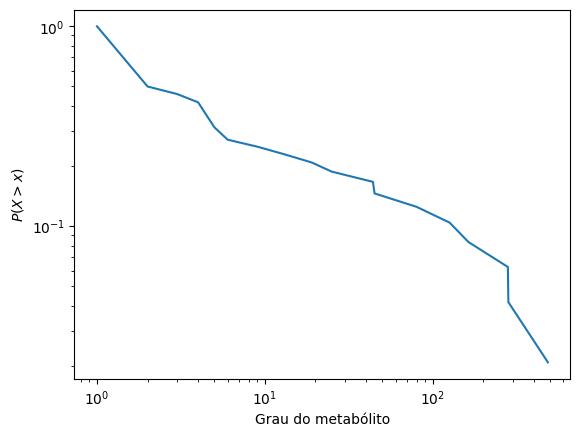

In [35]:
powerlaw.plot_ccdf(bacteria)
plt.ylabel(r'$P(X > x)$')
plt.xlabel('Grau do metabólito');

## Modelagem com Lei de Potência

In [36]:
fit = powerlaw.Fit(bacteria)

Calculating best minimal value for power law fit


Valor mínimo para Lei de Potência:

In [37]:
fit.power_law.xmin

1.0

Coeficiente da Lei de Potência:

In [38]:
fit.power_law.alpha

1.7293184521807015

Comparando **modelo** com os dados:

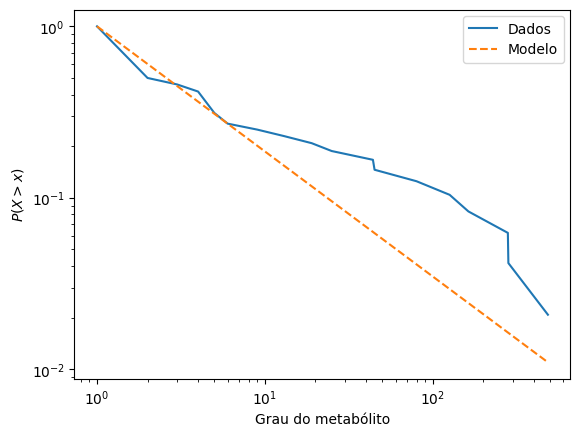

In [39]:
fig = fit.plot_ccdf(label='Dados')
fit.power_law.plot_ccdf(label='Modelo', linestyle='--', ax=fig)
plt.legend()
plt.ylabel(r'$P(X > x)$')
plt.xlabel('Grau do metabólito');